In [5]:
from MEA_analysis import backbone, stimulus_trace, spike_extractor, spike_plotly, single_stimulus
from importlib import reload  
import qgrid
%matplotlib widget
reload(spike_plotly)
reload(spike_extractor)
from ipywidgets import interact, interact_manual, interactive
import ipywidgets as widgets
import numpy as np
import pandas as pd
import scipy
import pyspike as spk
import matplotlib.pyplot as plt

import plotly.graph_objects as go

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from MEA_analysis import stimulus_and_spikes as sp
from MEA_analysis import Overview
#import numpy.ma as ma
from Basic_scripts import Basic

In [6]:
trigger_file = backbone.SelectFilesButton("Stimulus")
widgets.VBox([trigger_file, trigger_file.out])

In [151]:
Test_stimulus = stimulus_trace.Stimulus_Extractor(trigger_file.files[0])
Test_stimulus.plot_trigger_channel_new("10ms")


FigureWidget({
    'data': [{'marker': {'color': [#1f77b4, #1f77b4, #1f77b4, ..., #1f77b4,
                   …

In [152]:
Test_stimulus.get_stim_range_new()

0


C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [153]:
Stimulus_table = qgrid.show_grid(Test_stimulus.stimuli)
Stimulus_table

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [154]:
print([Test_stimulus.stimuli.iloc[i]["Trigger_int"].shape for i in range(len(Test_stimulus.stimuli))])

[(29,), (29,)]


In [155]:
Test_stimulus.get_changed_names(Stimulus_table)


In [12]:
spikes_file = backbone.SelectFilesButton("Spikes")
widgets.VBox([spikes_file, spikes_file.out])

In [156]:
reload(spike_extractor)
Spikes = spike_extractor.Recording_spikes(spikes_file.files[0])
thresholds = spike_extractor.Thresholds(Spikes.spikes, Test_stimulus)
overview = spike_plotly.Recording_overview(Spikes.spikes)
overview.plot_basic_recording_information(thresholds)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\ma\core.py:6900: RuntimeWarning:

overflow encountered in power



interactive(children=(IntText(value=82, description='Lower threshold:', style=DescriptionStyle(description_wid…

FloatText(value=0.5620115388884334, description='Lower threshold in spikes per minute:', style=DescriptionStyl…

interactive(children=(IntText(value=679, description='Upper threshold:', style=DescriptionStyle(description_wi…

FloatText(value=4.656813903631041, description='Upper threshold in spikes per minute:', style=DescriptionStyle…

interactive(children=(IntText(value=0, description='Left Threshold', style=DescriptionStyle(description_width=…

interactive(children=(IntText(value=12092, description='Right Threshold', style=DescriptionStyle(description_w…

In [157]:
#Load spikes

reload(stimulus_and_spikes)
Spikes.define_subset(thresholds.threshold_left_widget.value, thresholds.threshold_right_widget.value)
Spikes.define_thr(thresholds.threshold_up_widget.value, thresholds.threshold_low_widget.value)
spikes_df = Spikes.get_spikes(True, True)[2]

#Correlate spikes and stimuli
begin_idx, end_idx = stimulus_and_spikes.spikes_and_stimulus(spikes_df, Test_stimulus.stimuli)
stimulus_spikes = stimulus_and_spikes.extract_stimulus_spikes(spikes_df, Test_stimulus.stimuli['Stimulus_name'], begin_idx, end_idx, np.array(Test_stimulus.stimuli['Begin_Fr'][:], dtype=int))

In [158]:
complete_dataframe = pd.DataFrame(columns=('Cell index', 'Centres x', 'Centres y', 'Nr of Spikes', 'Area', 'Stimulus ID', 'Stimulus name', 'Spikes'))
row = 0

for cell in range(len(spikes_df)):
       
    for stimulus in range(len(stimulus_spikes)):
        nr_spikes_new = np.count_nonzero(~stimulus_spikes['Spikes'][stimulus][:, cell].mask)
        area_new =  spikes_df['Area'].loc[cell]* (nr_spikes_new/spikes_df['Nr of spikes'].loc[cell])
        complete_dataframe.loc[row] = [spikes_df['Cell index'].loc[cell], spikes_df['Centres x'].loc[cell],  spikes_df['Centres y'].loc[cell],
                                       nr_spikes_new, area_new, stimulus, 
                                       Test_stimulus.stimuli['Stimulus_name'][stimulus], stimulus_spikes['Spikes'][stimulus][:, cell]]
        row = row+1

        
multi_complete_dataframe = complete_dataframe.set_index(['Cell index', 'Stimulus ID', 'Centres x', 'Centres y', 'Nr of Spikes', 'Area', 'Stimulus name'])
complete_dataset = qgrid.show_grid(multi_complete_dataframe)
complete_dataset

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [127]:
#multi_complete_dataframe.to_pickle(Test_stimulus.recording_folder+"spikes_for_overview", compression="zip")
#Test_stimulus.stimuli.to_pickle(Test_stimulus.recording_folder+"stimulus_overview", compression="zip")

In [165]:
stimulus_extr = single_stimulus.Single_stimulus_spikes(multi_complete_dataframe, Test_stimulus)

In [166]:
stimulus_extr

In [18]:
def kernel_template(width=0.01):
    
    fwhm = int((Test_stimulus.sampling_frequency[0])*width) # in points

    # normalized time vector in ms
    k = int((Test_stimulus.sampling_frequency[0])*0.02)
    gtime = np.arange(-k,k)

    # create Gaussian window
    gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )
    gauswin = gauswin / np.sum(gauswin)

    # initialize filtered signal vector
    return gauswin

def spike_padding(spikes, trial_n):
    
    stim_time=np.zeros(len(np.linspace(0,int(4.05*6*Test_stimulus.sampling_frequency[0]),num=int(4.05*6*Test_stimulus.sampling_frequency[0]), endpoint=False)))
    
    for sp_times in range(len(spikes[trial_n])):
        stim_time[int(spikes[trial_n][sp_times])]=1
        
    return stim_time

def spike_padding_new(stim_time, spikes, trial_n):
    
    stim_time[trial_n][list(spikes[trial_n].astype(int))]=1
    return stim_time
    
def trial_kernelfit(spikes, trial_n, gauswin, print=False):
    
    stim_time=spike_padding(spikes,trial_n)
    k = int((Test_stimulus.sampling_frequency[0])*0.02)
    # implement the weighted running mean filter
    filtsigG = np.zeros(len(stim_time))
    for i in range(k+1,len(stim_time)-k):
        filtsigG[i] = np.sum( stim_time[i-k:i+k]*gauswin
    if print:
        plt.figure()
        plt.plot(filtsigG,'r',label='spike p.d.')   
    return filtsigG

def calc_tradqi(kernelfits):
    return np.var(np.mean(kernelfits,0))/np.mean(np.var(kernelfits,0))

In [25]:
import multiprocessing as mp
from functools import partial
import time

In [175]:
def calculate_qi(stim_idx:list, cell_idces=None, kernel_width=0.0125):
    stimulus_extr.load_spikes_for_stimulus(stim_idx)
    if not cell_idces:
        chosen_ones= stimulus_extr.spikes_stimulus.index.get_level_values(0).values
    #cell_idces= stimulus_extr.spikes_stimulus.index.get_level_values(0).values if not cell_idces else cell_idces
    offic_test=np.zeros(len(cell_idces)) 
    
    Quality_df = single_stimulus.calculate_quality_index(stimulus_extr.spikes_stimulus, stimulus_extr.trigger_complete,
                                                         int(stimulus_extr.stimulus_info["Stimulus_repeat_logic"]),
                                                         Test_stimulus.sampling_frequency[0])
        


    print(stimulus_extr.spikes_stimulus.index[0][-1])
    stimulus_traits= Basic.get_stimulus_traits(Test_stimulus.stimuli, stim_idx)
    repeat_duration= np.floor((Test_stimulus.stimuli.loc[stim_idx]['Trigger_Fr_relative'][stimulus_traits['stim_trials']]-Test_stimulus.stimuli.loc[stim_idx]['Trigger_Fr_relative'][0])
                              /Test_stimulus.sampling_frequency[0])
    print('Repeat duration:' , repeat_duration )


    gauswins=np.tile(kernel_template(width=kernel_width)[::-1], (stimulus_traits['stim_repeats'],1))


    for idx,cell in enumerate(cell_idces):
        if np.sum(stimulus_extr.spikes_stimulus.loc[cell]['Spikes'].values[0].compressed())<1:
            offic_test[idx]=np.nan
            continue
        else:
            spikes = sp.get_spikes_whole_stimulus_trainsomitted(
                        stimulus_extr.spikes_stimulus, stimulus_extr.trigger_complete,
                                     cell,
                                     int(stimulus_extr.stimulus_info["Stimulus_repeat_logic"]),
                                     Test_stimulus.sampling_frequency[0])


            frames= int(np.ceil((repeat_duration+0.3)*Test_stimulus.sampling_frequency[0]))
            spiketimes=np.zeros((len(spikes), frames-1))
            exs=np.zeros((len(spikes), frames-gauswins.shape[1]))
            for trial in range(len(spikes)):
                spiketimes= spike_padding_new(spiketimes, spikes, trial)
            exs=scipy.signal.oaconvolve(spiketimes, gauswins, mode='valid', axes=1)
            offic_test[idx]=calc_tradqi(exs)

        if idx%1000==0:
            print(cell_idces[idx], offic_test[idx])
    stimulus_extr.spikes_stimulus['New_qi']=offic_test
    
    return stimulus_extr.spikes_stimulus
        

In [176]:
for stimulus_idx in range(len(Test_stimulus.stimuli)):
    scripting=calculate_qi(stimulus_idx, chosen_ones)
    if stimulus_idx==0:
        pd_parent=scripting.copy()
    else:
        pd_parent=pd.concat([pd_parent, scripting])

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



FFF_4s
Repeat duration: 48.0
7 0.6658773152084105


<ipython-input-18-3bba5c29d094>:87: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.2499026228394166


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



FFF_2s
Repeat duration: 24.0
7 1.7452662659061178


<ipython-input-18-3bba5c29d094>:87: RuntimeWarning:

invalid value encountered in double_scalars



1008 nan


In [177]:
pd_parent

,,,,,,Spikes,Max isi,Std sync,Max psth,Total qc,stimulus spikes,Histogram,Bins,ISI mean,mean sync,total qc new,New_qi
Cell index,Centres x,Centres y,Nr of Spikes,Area,Stimulus name,,,,,,,,,,,,
7,0.087701,41.940815,29,0.031650,FFF_4s,"[142839, 285680, 428502, 571919, 714742, 85814...",0.546657,0.248039,3.0,0.406777,18.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05004443610133947, 0.05004443610133947...",0.488729,0.343750,0.806595,0.665877
8,2436.360360,1847.361522,2354,2.569140,FFF_4s,"[4018, 5458, 9100, 9189, 13111, 15130, 15957, ...",0.858190,0.237926,9.0,1.837668,4706.0,"[4.0, 4.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 5.0, ...","[0.0, 0.05004443610133947, 0.05004443610133947...",0.576233,0.220901,1.658382,0.294502
9,2391.884049,1009.633194,1797,1.961234,FFF_4s,"[1288, 2286, 7838, 8201, 8756, 9076, 11035, 13...",0.828355,0.229475,7.0,1.330605,3592.0,"[1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, ...","[0.0, 0.05004443610133947, 0.05004443610133947...",0.544970,0.232252,1.280984,NaN
10,1428.523538,84.865417,1910,2.084561,FFF_4s,"[4586, 4741, 5027, 5110, 5522, 6757, 7740, 826...",0.892590,0.287405,17.0,4.361088,3816.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 3.0, ...","[0.0, 0.05004443610133947, 0.05004443610133947...",0.556381,0.276233,4.441565,NaN
11,1974.677832,210.872517,1840,2.008164,FFF_4s,"[1122, 1877, 2615, 4264, 8588, 15099, 16330, 2...",0.853895,0.239070,7.0,1.428986,3670.0,"[1.0, 1.0, 3.0, 3.0, 4.0, 4.0, 1.0, 1.0, 2.0, ...","[0.0, 0.05004443610133947, 0.05004443610133947...",0.572685,0.252584,1.318201,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4088,672.280289,1973.772439,0,0.000000,FFF_2s,"[--, --, --, --, --, --, --, --, --, --, --, -...",0.000000,0.000000,0.0,0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.000000,1.000000,0.000000,NaN
4089,671.342113,2015.592588,0,0.000000,FFF_2s,"[--, --, --, --, --, --, --, --, --, --, --, -...",0.000000,0.000000,0.0,0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.000000,1.000000,0.000000,NaN
4090,587.825516,1596.597320,0,0.000000,FFF_2s,"[--, --, --, --, --, --, --, --, --, --, --, -...",0.000000,0.000000,0.0,0.000000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.000000,1.000000,0.000000,NaN


In [149]:
sum((pd_parent.xs("FFF_3", level="Stimulus name")['New_qi'])>0.3)

56

In [178]:
plt.figure()
plt.scatter(pd_parent[:len(chosen_ones)]['total qc new'], pd_parent[:len(chosen_ones)]['New_qi'])
plt.ylim(0,1)
plt.scatter(pd_parent[len(chosen_ones):]['total qc new'], pd_parent[len(chosen_ones):]['New_qi'])
plt.ylim(0,1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.0, 1.0)

In [201]:
print(sum(stimulus_extr.spikes_stimulus['total qc new']>2))
stimulus_extr.spikes_stimulus[stimulus_extr.spikes_stimulus['total qc new']>2]

6


,,,,,,Spikes,Max isi,Std sync,Max psth,Total qc,stimulus spikes,Histogram,Bins,ISI mean,mean sync,total qc new
Cell index,Centres x,Centres y,Nr of Spikes,Area,Stimulus name,,,,,,,,,,,
10,1428.523538,84.865417,1048,1.143780,FFF_3,"[4613, 6806, 10582, 10755, 11962, 12670, 14248...",0.837019,0.272186,19.0,4.328663,2092.0,"[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.565850,0.290831,4.695319
16,2051.180040,1996.205544,726,0.792352,FFF_3,"[30719, 31169, 32253, 32705, 32889, 35113, 460...",0.861853,0.254266,20.0,4.382797,1450.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.569351,0.266207,4.809967
19,1515.244591,293.099661,507,0.553336,FFF_3,"[2481, 16492, 47757, 47917, 48241, 54834, 5495...",0.864604,0.179988,14.0,2.178652,1012.0,"[0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 1.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.630340,0.109467,2.351232
23,715.987159,714.968949,625,0.682121,FFF_3,"[5721, 6146, 6544, 7279, 9744, 10333, 10585, 1...",0.893502,0.241264,12.0,2.586836,1248.0,"[1.0, 1.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.555504,0.232200,2.688107
24,2523.189146,211.220933,917,1.000808,FFF_3,"[8350, 10071, 11263, 12409, 12943, 13048, 1356...",0.856757,0.272269,17.0,3.965562,1828.0,"[0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.514689,0.319869,4.241178
27,1526.236711,2328.688082,128,0.139698,FFF_3,"[15500, 31392, 31737, 31974, 45392, 48193, 668...",0.856799,0.284006,7.0,1.703350,254.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.05009322485543222, 0.05009322485543222...",0.567970,0.306202,2.035438


In [134]:
stimulus_traits=Basic.get_stimulus_traits(Test_stimulus.stimuli, 0)

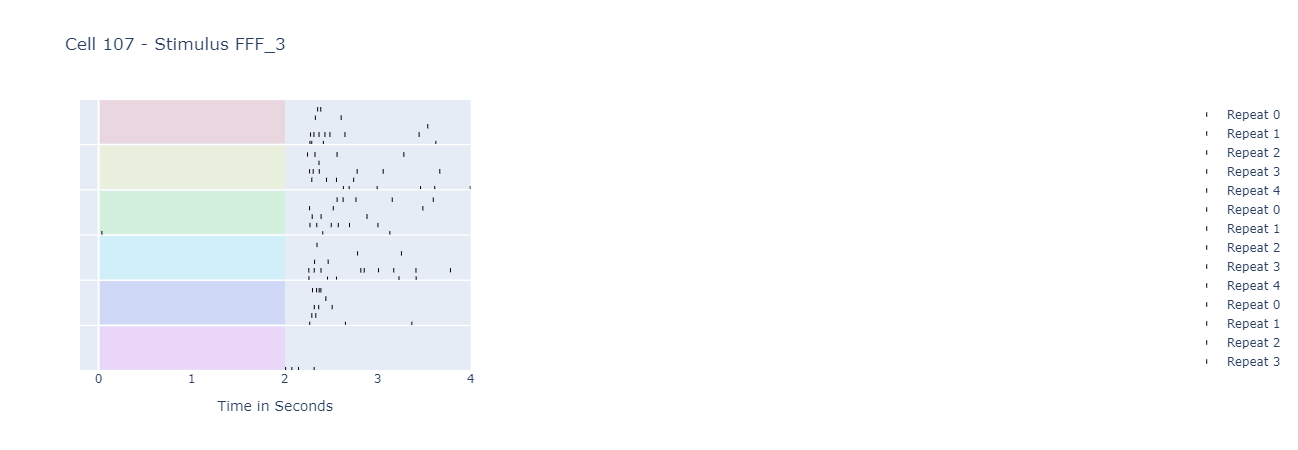

In [216]:
cell_of_int= 24
cell_spikes=Basic.get_cell_spiketrains_per_stimulus(cell_of_int, stimulus_extr.spikes_stimulus.reset_index(), stimulus_traits, 4, Test_stimulus.sampling_frequency[0])
Basic.plot_sc_aligned_new(cell_of_int, cell_spikes, stimulus_traits, 4, colors)